<a href="https://colab.research.google.com/github/confusedhuman10/BrainTumorPrediction/blob/main/BrainTumorUsingMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
import time
import cv2
import imutils
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)
#PIL- Python Image Library, it supports opening, manipulating and saving many different image file formats etc.

Pillow Version: 7.0.0


In [ ]:
from PIL import Image
image = Image.open('no/no 1.jpg')
print(image.format)
print(image.mode)
print(image.size)

uint8
(168, 300, 3)


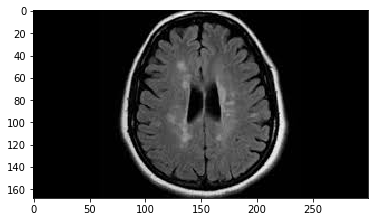

In [ ]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('no/13 no.jpg')
print(data.dtype)
print(data.shape)
pyplot.imshow(data)
pyplot.show()

(218, 180, 3)
JPEG
RGB
(180, 218)


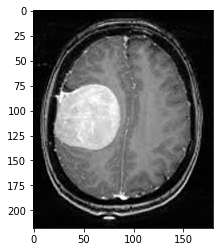

In [ ]:
from PIL import Image
from numpy import asarray
image = Image.open('yes/Y1.jpg')
data = asarray(image)
print(data.shape)
print(image.format)
print(image.mode)
print(image.size)
pyplot.imshow(data)
pyplot.show()

In [ ]:
#loading all the images in a directory
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('yes'):
    brain_tumor = image.imread('yes/' + filename)
    loaded_images.append(brain_tumor)
    print('>Loaded %s %s' %(filename, brain_tumor.shape))

>Loaded Y1.jpg (218, 180, 3)
>Loaded Y10.jpg (360, 319)
>Loaded Y100.JPG (348, 287, 3)
>Loaded Y101.jpg (336, 300)
>Loaded Y102.jpg (630, 587, 3)
>Loaded Y103.jpg (993, 825, 3)
>Loaded Y104.jpg (890, 700, 3)
>Loaded Y105.jpg (246, 205, 3)
>Loaded Y106.jpg (253, 200, 3)
>Loaded Y107.jpg (512, 512, 3)
>Loaded Y108.jpg (1200, 1059)
>Loaded Y108.png (1200, 1059, 3)
>Loaded Y109.JPG (279, 258, 3)
>Loaded Y11.jpg (369, 400, 3)
>Loaded Y111.JPG (324, 272, 3)
>Loaded Y112.JPG (366, 310, 3)
>Loaded Y113.JPG (312, 254, 3)
>Loaded Y114.JPG (249, 178, 3)
>Loaded Y115.JPG (298, 260, 3)
>Loaded Y116.JPG (269, 249, 3)
>Loaded Y117.JPG (310, 246, 3)
>Loaded Y12.jpg (500, 377)
>Loaded Y120.JPG (245, 224, 3)
>Loaded Y13.jpg (325, 254, 3)
>Loaded Y14.jpg (300, 289)
>Loaded Y146.JPG (355, 311, 3)
>Loaded Y147.JPG (352, 321, 3)
>Loaded Y148.JPG (283, 231, 3)
>Loaded Y15.jpg (380, 310, 3)
>Loaded Y153.jpg (359, 300, 3)
>Loaded Y154.jpg (431, 400, 3)
>Loaded Y155.JPG (355, 310, 3)
>Loaded Y156.JPG (370, 286,

In [ ]:
from matplotlib import image
from os import listdir
loaded_images = list()
for filename in listdir('no'):
    non_tumor = image.imread('no/' + filename)
    loaded_images.append(non_tumor)
    print('>Loaded %s %s' %(filename, non_tumor.shape))

In [ ]:
from PIL import Image
image = Image.open('Yes/Y108.jpg')
image.save('Yes/Y108.png',format='PNG')
up_format = Image.open('Yes/Y108.png')
print(up_format.format)

In [ ]:
#gray scale version of loaded image
from PIL import Image
image = Image.open('Yes/Y108.jpg')
gray_image = image.convert(mode= 'L')
gray_image.save('Yes/Y108.jpg')
_image = Image.open('Yes/Y108.jpg')
_image.show()

In [ ]:
#resize of image
rs_size = Image.open('Yes/Y108.jpg')
image.thumbnail((50,20))
print(image.size)

In [ ]:
def brain_crop(image, plot=False):
   
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

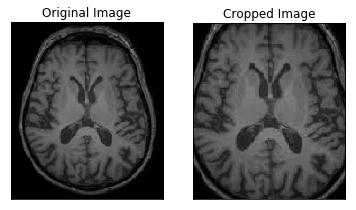

In [ ]:
cp_img = cv2.imread('no/10 no.jpg')
cp_new_img = brain_crop(cp_img,True)

In [ ]:
#cropping a portion of image as segment
image = Image.open('yes/Y8.jpg')

cropped = image.crop((50,100,150,200))
cropped.show()

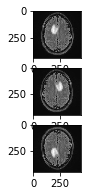

In [ ]:
#Flipping of tumor data
flip_image = Image.open('Yes/Y1.jpg')
#horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

pyplot.subplot(411)
pyplot.imshow(image)

pyplot.subplot(412)
pyplot.imshow(hoz_flip)

pyplot.subplot(413)
pyplot.imshow(ver_flip)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from zipfile import ZipFile
brain_data = '/content/gdrive/My Drive/Brain Tumor Data sets.zip'

with ZipFile(brain_data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classes = os.listdir('/content/Brain Tumor Data sets/Training')

In [ ]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]

In [ ]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "/content/Brain Tumor Data sets/Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

no_tumor
no_tumor
glioma_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor
pituitary_tumor
pituitary_tumor
(2870, 150, 150, 3)
(2870, 4)


In [ ]:
testData = []
testLabel = []
dim = (150, 150)
testPath = "/content/Brain Tumor Data sets/Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

no_tumor
no_tumor
glioma_tumor
glioma_tumor
meningioma_tumor
meningioma_tumor
pituitary_tumor
pituitary_tumor
(394, 150, 150, 3)
(394, 4)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))           
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [ ]:
history = model.fit(trainData, trainLabel,batch_size = 32, epochs = 19, verbose=1,validation_data=(testData, testLabel))

Epoch 1/19
90/90 [==============================] - 62s 676ms/step - loss: 31.9022 - val_loss: 1.3883
Epoch 2/19
90/90 [==============================] - 61s 674ms/step - loss: 1.3762 - val_loss: 1.3920
Epoch 3/19
90/90 [==============================] - 61s 678ms/step - loss: 1.3689 - val_loss: 1.3965
Epoch 4/19
90/90 [==============================] - 60s 671ms/step - loss: 1.3606 - val_loss: 1.4017
Epoch 5/19
90/90 [==============================] - 61s 675ms/step - loss: 1.3574 - val_loss: 1.4067
Epoch 6/19
90/90 [==============================] - 64s 710ms/step - loss: 1.3548 - val_loss: 1.4110
Epoch 7/19
90/90 [==============================] - 63s 706ms/step - loss: 1.3510 - val_loss: 1.4160
Epoch 8/19
90/90 [==============================] - 62s 687ms/step - loss: 1.3531 - val_loss: 1.4198
Epoch 9/19
90/90 [==============================] - 61s 681ms/step - loss: 1.3523 - val_loss: 1.4236
Epoch 10/19
90/90 [==============================] - 60s 666ms/step - loss: 1.3483 - val_l

In [ ]:
model.save("brain-tumor-model.h5")

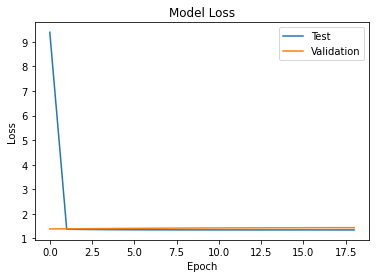

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

28.756949305534363% Confidence This Is glioma_tumor


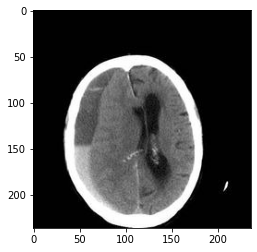

In [ ]:
img = Image.open('/content/Brain Tumor Data sets/Testing/no_tumor/image(1).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

28.756949305534363% Confidence This Is glioma_tumor


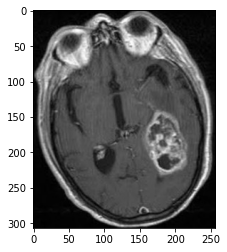

In [ ]:
img = Image.open('/content/Brain Tumor Data sets/Testing/meningioma_tumor/image(10).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is pituitary_tumor


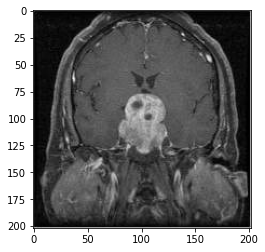

In [ ]:
img = Image.open('/content/Brain Tumor Data sets/Testing/pituitary_tumor/image(13).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))